In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading in the data

In [2]:
covid = pd.read_csv("data/covid_us_impact_by_state.csv")
covid.head()

,State,Confirmed_cases,Deaths
0,Alabama,42862,1007
1,Alaska,1107,16
2,American Samoa,0,0
3,Arizona,94567,1817
4,Arkansas,23209,286


In [3]:
party_data = pd.read_csv("data/party_data_by_state.csv")
party_data.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update])
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic


In [4]:
pop_data = pd.read_csv("raw_data/pop_density_by_state.csv")
pop_data.head()

# Note: density is calculated as population/landArea (in people per square mile)

,State,Density,Pop,LandArea
0,Washington DC,11814.5410,720687,61
1,New Jersey,1215.1985,8936570,7354
2,Rhode Island,1021.4313,1056160,1034
3,Massachusetts,894.4359,6976600,7800
4,Connecticut,735.8695,3563080,4842


## Merging the data

In [5]:
df = party_data.merge(covid, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334


In [6]:
df = df.merge(pop_data, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths,Density,Pop,LandArea
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007,96.9221,4908620,50645
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16,1.2863,734002,570641
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817,64.9549,7378490,113594
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286,58.4030,3039000,52035
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334,256.3728,39937500,155779


In [7]:
df = df.assign(confirmed_cases_per_1000_inhabitants = df["Confirmed_cases"] / df["Pop"] * 1000)
df = df.assign(deaths_per_1000_inhabitants = df["Deaths"] / df["Pop"] * 1000)
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths,Density,Pop,LandArea,confirmed_cases_per_1000_inhabitants,deaths_per_1000_inhabitants
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007,96.9221,4908620,50645,8.731986,0.205149
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16,1.2863,734002,570641,1.508170,0.021798
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817,64.9549,7378490,113594,12.816579,0.246256
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286,58.4030,3039000,52035,7.637052,0.094110
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334,256.3728,39937500,155779,6.332269,0.158598


## Analysis

### Comparing cases and deaths for red and blue states

We started by testing if there were any significant differences in the number of confirmed cases and deaths between the two groups.

In [8]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Confirmed_cases"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Confirmed_cases"], 
                      equal_var=False)

Ttest_indResult(statistic=-1.1067041881404796, pvalue=0.27899227960666256)

In [9]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"], 
                      equal_var=False)

Ttest_indResult(statistic=-1.6692262204046215, pvalue=0.11036736102384771)

In [10]:
df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"].mean()

1427.1666666666667

In [11]:
df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"].mean()

4306.65

In [12]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "confirmed_cases_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "confirmed_cases_per_1000_inhabitants"],
                      equal_var=False)

Ttest_indResult(statistic=-1.4944772589505249, pvalue=0.14705111039498747)

In [13]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=-2.6267589032612118, pvalue=0.015500963862708106)

In [14]:
df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"].mean()

0.19246483742187975

In [15]:
df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"].mean()

0.5140193995861481

There is no significant difference in terms of confirmed cases (in total or per capita) nor in terms of total deaths between red and blue states. However, the number of deaths per capita is on average significantly higher for democratic states. 

This makes sense: the first wave of coronavirus hit the northeast coast the hardest (which is mostly democratic), with New York being the epicenter of the pandemic for quite some time. 

We were concerned that splitting the states based on their vote in the 2016 election was not a fair way to divide them; after all, political power is distributed at various levels, from the state governorship to city mayors, all of which are involved in setting health policies in their jurisdictions. The fact that a state voted for one party in the 2016 election does not necessarily mean that the main actors involved in setting policies belong to that state. Therefore, we decided to split the data based on a different criterion. 

We chose to look at the state Governor's party affiliation, because Governors are responsible for issuing statewide orders suchs as stay at home orders or mandatory mask use in public spaces.

In [16]:
scipy.stats.ttest_ind(df.loc[df["Governor"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["Governor"] == "Democratic", "deaths_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=-2.113672017999524, pvalue=0.042341387777892134)

The conclusions held; the difference in the number of deaths per capita remained significant at a 95% confidence level.

Because of this, we decided to stick with the 2016 presidential vote as a criterion to split the states into two groups. There might be some differences when you look at different levels of government, but we expect they will be minor when looking at the issue from a state level.

## Visualizing the difference in deaths per capita in red and blue states

In [17]:
df = df.sort_values("deaths_per_1000_inhabitants", ascending=False)

cmap = list(np.where(df["2016 presidentialelection"] == "Democratic", "blue", "red"))

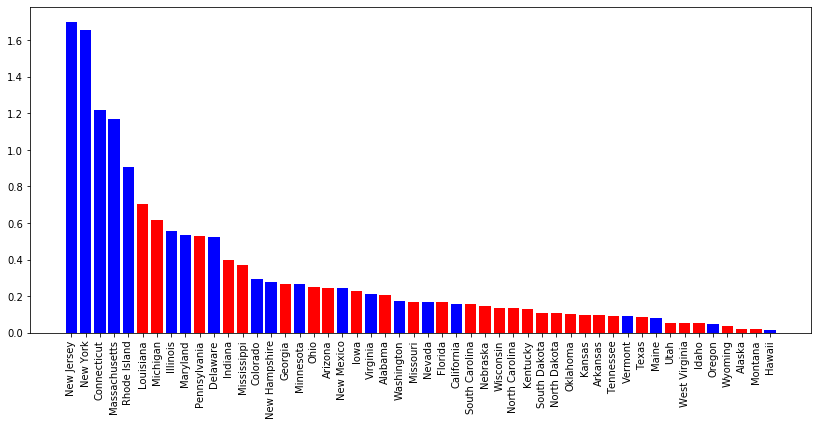

In [18]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["deaths_per_1000_inhabitants"], 
       color = cmap)

plt.xticks(rotation=90);

## Correlation between deaths and population density

Coronavirus tends to spread faster in concentrated urban nuclei rather than in sparser populated rural areas, and hospitals can quickly see themselves overwhelmed, leading to increased death rates. The disease hit nursing homes for the elderly particularly hard (at least in Europe), also a contributing factor for higher death rates. Furthermore, public transportation and events where many people gather, particularly in closed spaces, are also thought to be a major contributor for a quick spread of the disease.

Therefore, we were interested to see if state population density could explain the difference observed before between blue and red states.

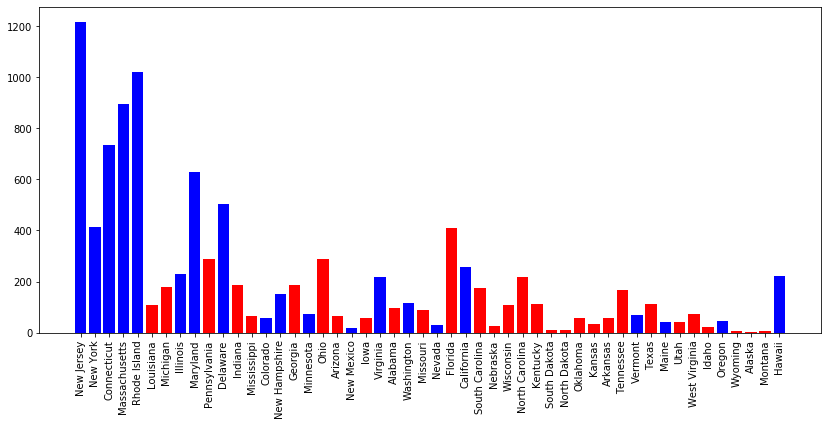

In [19]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["Density"], 
       color = cmap)

plt.xticks(rotation=90);

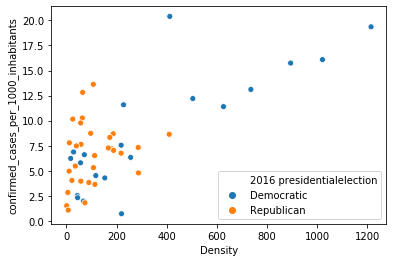

In [20]:
sns.scatterplot(data = df, x = "Density", y = "confirmed_cases_per_1000_inhabitants", hue = "2016 presidentialelection");

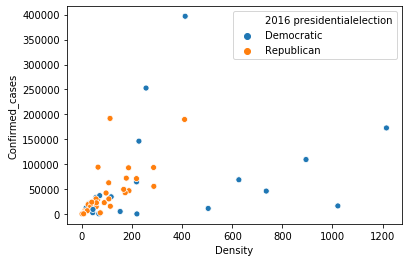

In [21]:
sns.scatterplot(data = df, x = "Density", y = "Confirmed_cases", hue = "2016 presidentialelection");

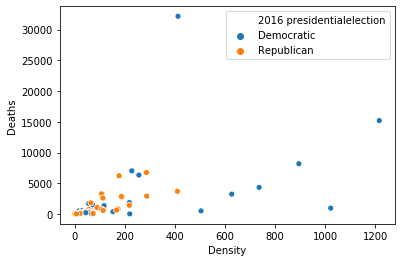

In [22]:
sns.scatterplot(data = df, x = "Density", y = "Deaths", hue = "2016 presidentialelection");

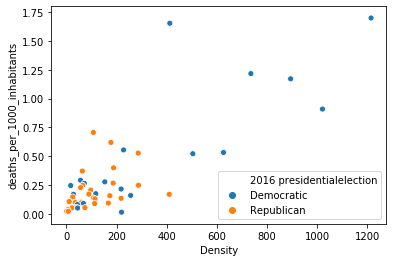

In [23]:
sns.scatterplot(data = df, x = "Density", y = "deaths_per_1000_inhabitants", hue = "2016 presidentialelection");

In [24]:
df["Density"].corr(df["Deaths"])

0.47132524832124534

In [25]:
df["Density"].corr(df["deaths_per_1000_inhabitants"])

0.805247986436947

In [26]:
df["Density"].corr(df["Confirmed_cases"])

0.37665687491527106

In [27]:
df["Density"].corr(df["confirmed_cases_per_1000_inhabitants"])

0.701848594648896

In [28]:
df.to_csv("data/df_everything_but_policy_data.csv", index = False)

In [29]:
policy_data = pd.read_csv("data/mask_and_lockdown_policy_data.csv", index_col = 0)
policy_data.head()

,Date_first_100_infections,Infections,State,Date_first_100_deaths,Deaths,PublicMask_start,PublicMask_eased,PublicMask_ended,StayAtHome_start,StayAtHome_eased,StayAtHome_ended,StayAtHome_Delta,PublicMask_Delta,StayAtHome_deaths_Delta,PublicMask_deaths_Delta,StayAtHome_policy_eased,PublicMask_policy_eased,StayAtHome_policy_ended,PublicMask_policy_ended
index,,,,,,,,,,,,,,,,,,,
0,2020-04-05,112,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-28,100,Puerto Rico,2020-05-07,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-07-04,111,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-14,104,Alabama,2020-05-28,100.0,NaN,NaN,NaN,2020-04-04,NaN,2020-04-30,-40 days +00:00:00.000000000,NaN,-54 days +00:00:00.000000000,NaN,NaN,NaN,26 days 00:00:00.000000000,NaN
4,2020-04-08,103,Alaska,NaN,NaN,NaN,NaN,NaN,2020-03-28,NaN,2020-04-24,-11 days +00:00:00.000000000,NaN,NaN,NaN,NaN,NaN,27 days 00:00:00.000000000,NaN


In [30]:
df = df.merge(policy_data, on = "State")
df.head()

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,...,StayAtHome_eased,StayAtHome_ended,StayAtHome_Delta,PublicMask_Delta,StayAtHome_deaths_Delta,PublicMask_deaths_Delta,StayAtHome_policy_eased,PublicMask_policy_eased,StayAtHome_policy_ended,PublicMask_policy_ended
0,New Jersey,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,173033,...,NaN,2020-06-09,-15 days +00:00:00.000000000,8 days 00:00:00.000000000,-55 days +00:00:00.000000000,-32 days +00:00:00.000000000,NaN,NaN,80 days 00:00:00.000000000,NaN
1,New York,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,396598,...,2020-05-15,2020-06-08,0 days 00:00:00.000000000,26 days 00:00:00.000000000,-71 days +00:00:00.000000000,-45 days +00:00:00.000000000,54 days 00:00:00.000000000,NaN,78 days 00:00:00.000000000,NaN
2,Connecticut,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,46717,...,NaN,NaN,NaN,32 days 00:00:00.000000000,NaN,14 days 00:00:00.000000000,NaN,NaN,NaN,NaN
3,Massachusetts,Democratic,Republican,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,109838,...,NaN,NaN,NaN,40 days 00:00:00.000000000,NaN,-16 days +00:00:00.000000000,NaN,NaN,NaN,NaN
4,Rhode Island,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,16991,...,2020-05-09,NaN,-27 days +00:00:00.000000000,14 days 00:00:00.000000000,-20 days +00:00:00.000000000,21 days 00:00:00.000000000,42 days 00:00:00.000000000,NaN,NaN,NaN


In [31]:
df.dtypes

State                                    object
2016 presidentialelection                object
Governor                                 object
State Senate                             object
State House                              object
SeniorU.S. Senator                       object
JuniorU.S. Senator                       object
U.S. House of Representatives            object
Partisan split (as of 2018[update])      object
Confirmed_cases                           int64
Deaths_x                                  int64
Density                                 float64
Pop                                       int64
LandArea                                  int64
confirmed_cases_per_1000_inhabitants    float64
deaths_per_1000_inhabitants             float64
Date_first_100_infections                object
Infections                                int64
Date_first_100_deaths                    object
Deaths_y                                float64
PublicMask_start                        

In [32]:
columns_to_delta = list(df.columns[-6:])
columns_to_delta

['StayAtHome_deaths_Delta',
 'PublicMask_deaths_Delta',
 'StayAtHome_policy_eased',
 'PublicMask_policy_eased',
 'StayAtHome_policy_ended',
 'PublicMask_policy_ended']

In [33]:
for col in columns_to_delta:
    df[col] = pd.to_timedelta(df[col]).dt.days

In [34]:
df.dtypes

State                                    object
2016 presidentialelection                object
Governor                                 object
State Senate                             object
State House                              object
SeniorU.S. Senator                       object
JuniorU.S. Senator                       object
U.S. House of Representatives            object
Partisan split (as of 2018[update])      object
Confirmed_cases                           int64
Deaths_x                                  int64
Density                                 float64
Pop                                       int64
LandArea                                  int64
confirmed_cases_per_1000_inhabitants    float64
deaths_per_1000_inhabitants             float64
Date_first_100_infections                object
Infections                                int64
Date_first_100_deaths                    object
Deaths_y                                float64
PublicMask_start                        

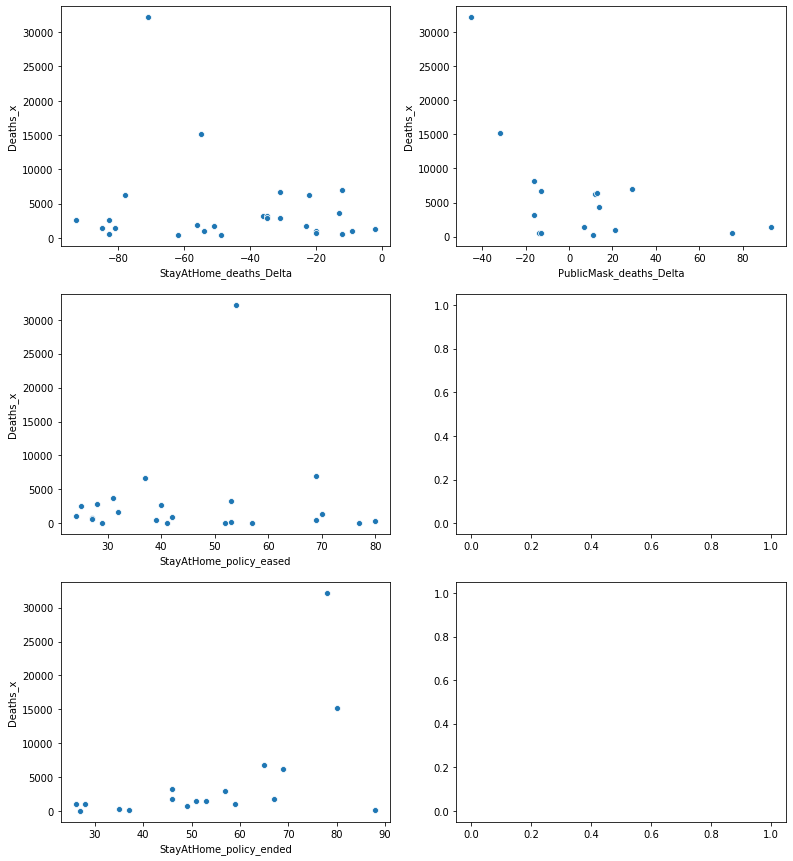

In [35]:
fig, ax = plt.subplots(figsize=(13, 15), nrows=3, ncols=2)

i=0
for col in columns_to_delta:
    sns.scatterplot(data = df, x = col, y = "Deaths_x", ax=ax.flatten()[i])
    i+=1

In [36]:
time_series_deaths = pd.read_csv("raw_data/us_deaths.csv")
time_series_cases = pd.read_csv("raw_data/us_confirmed.csv")

In [37]:
time_series_deaths.dtypes

UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Lat               float64
Combined_Key       object
Population          int64
Date               object
Case                int64
Long              float64
Country/Region     object
Province/State     object
dtype: object

In [38]:
time_series_deaths["Date"] = pd.to_datetime(time_series_deaths["Date"])
time_series_cases["Date"] = pd.to_datetime(time_series_cases["Date"])

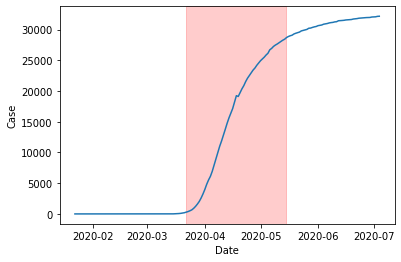

In [39]:
ax = sns.lineplot(x = "Date", 
                  y = "Case", 
                  data = (time_series_deaths.loc[time_series_deaths["Province/State"]=="New York"]
                          .groupby(["Province/State", "Date"], as_index=False)
                          .agg({"Case":"sum"})));


ax.axvspan(pd.to_datetime(df.loc[df["State"]=="New York", "StayAtHome_start"]).iloc[0], 
           pd.to_datetime(df.loc[df["State"]=="New York", "StayAtHome_eased"]).iloc[0], 
           alpha=0.2, 
           color='red');


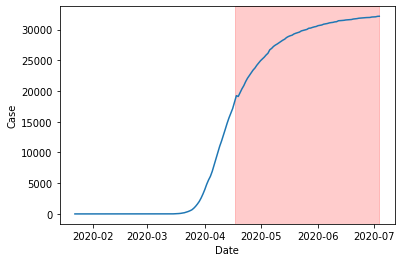

In [40]:
ax = sns.lineplot(x = "Date", 
                  y = "Case", 
                  data = (time_series_deaths.loc[time_series_deaths["Province/State"]=="New York"]
                          .groupby(["Province/State", "Date"], as_index=False)
                          .agg({"Case":"sum"})));



ax.axvspan(pd.to_datetime(df.loc[df["State"]=="New York", "PublicMask_start"]).iloc[0], 
           time_series_deaths["Date"].max(), 
           alpha=0.2, 
           color='red');


In [41]:
how_to_plot = []

for row in df.index:
    if pd.notna(df.loc[row, "StayAtHome_start"]) and pd.notna(df.loc[row, "StayAtHome_eased"]):
        how_to_plot.append("eased") # eased, regardless of whether it ended or not
    elif pd.notna(df.loc[row, "StayAtHome_start"]) and pd.isna(df.loc[row, "StayAtHome_eased"]) and pd.notna(df.loc[row, "StayAtHome_ended"]):
        how_to_plot.append("ended") # not eased, and ended
    elif pd.notna(df.loc[row, "StayAtHome_start"]) and pd.isna(df.loc[row, "StayAtHome_eased"]) and pd.isna(df.loc[row, "StayAtHome_ended"]):
        how_to_plot.append("ongoing") # ongoing
    else:
        how_to_plot.append("none") # no mandatory statewide stay at home order whatsoever
        
df = df.assign(how_to_plot = how_to_plot)

In [42]:
df["how_to_plot"].value_counts()

eased      23
ended      14
none       12
ongoing     1
Name: how_to_plot, dtype: int64

In [43]:
df["color_2016_pe"] = np.where(df["2016 presidentialelection"] == "Democratic", "blue", "red")

In [44]:
df = df.sort_values("Density", ascending = False)

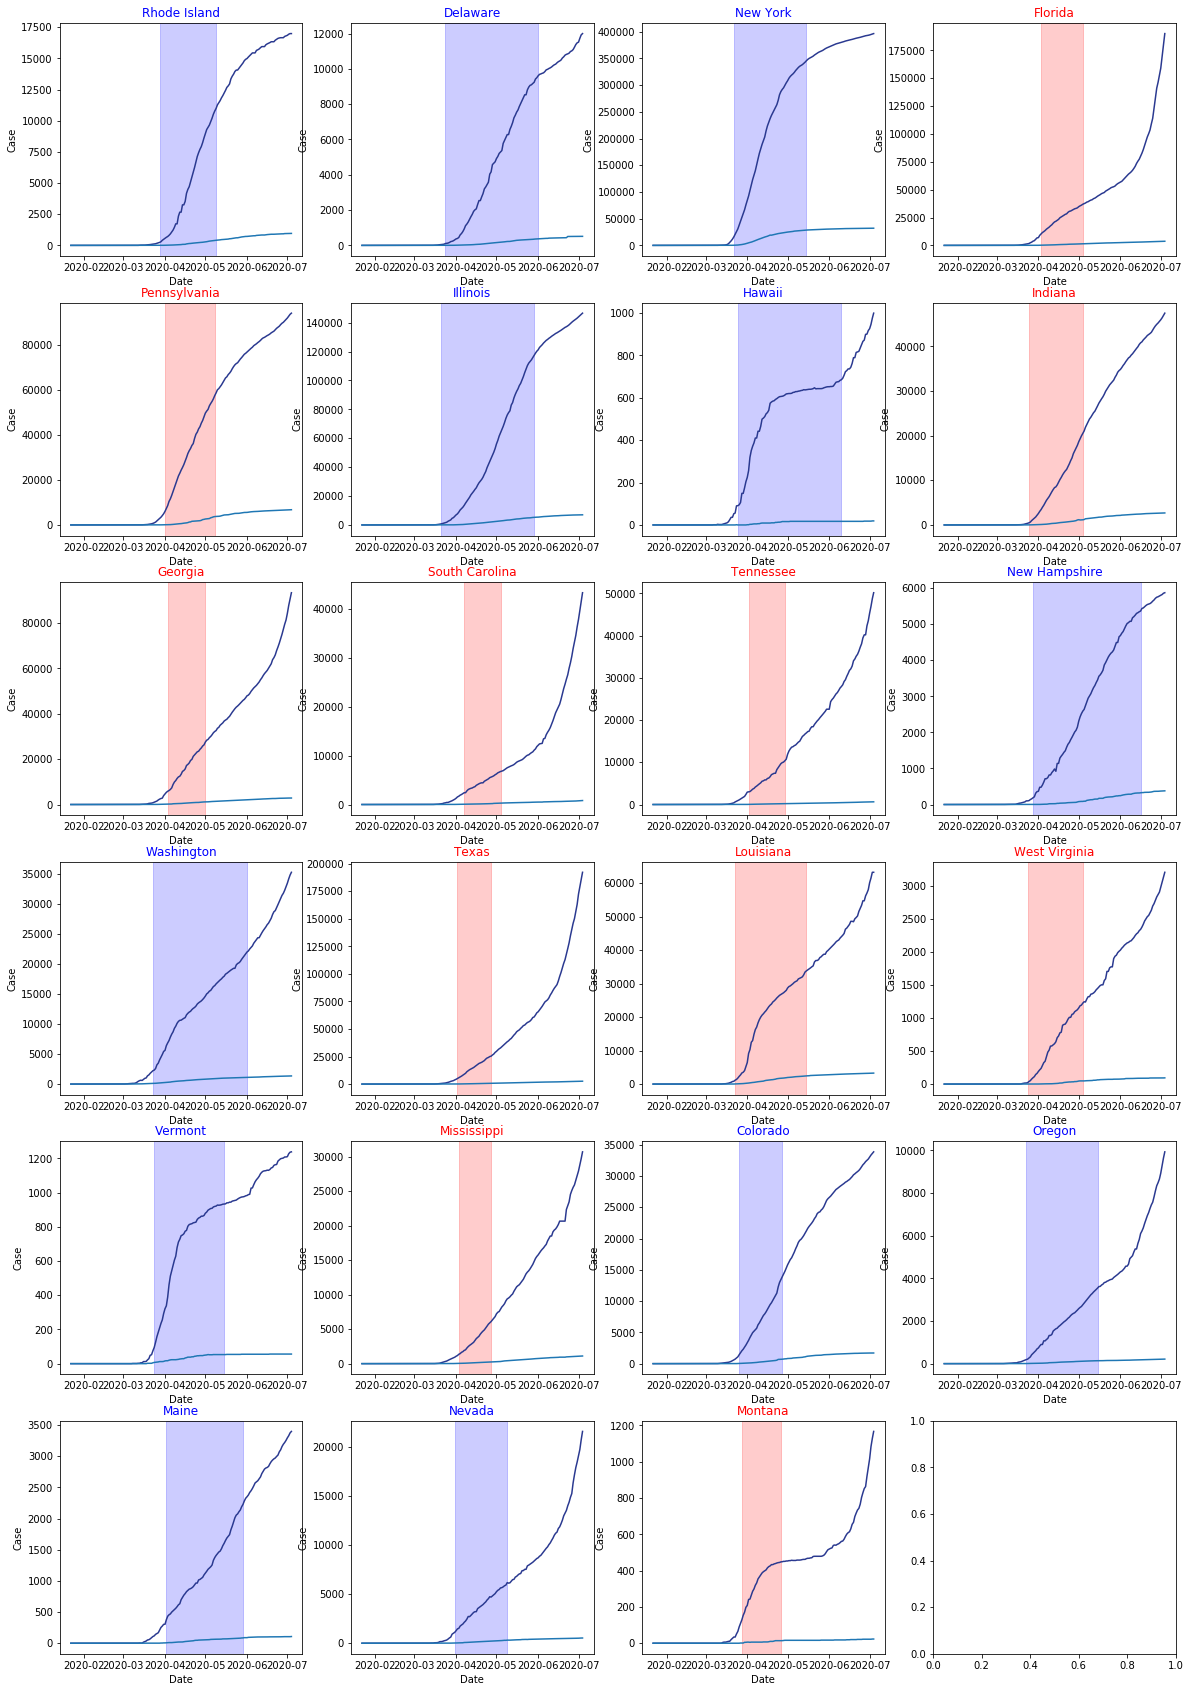

In [45]:
fig, ax = plt.subplots(figsize = (20, 30), nrows = 6, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="eased", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                            pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_eased"]).iloc[0], 
                            alpha=0.2, 
                            color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
    i+=1


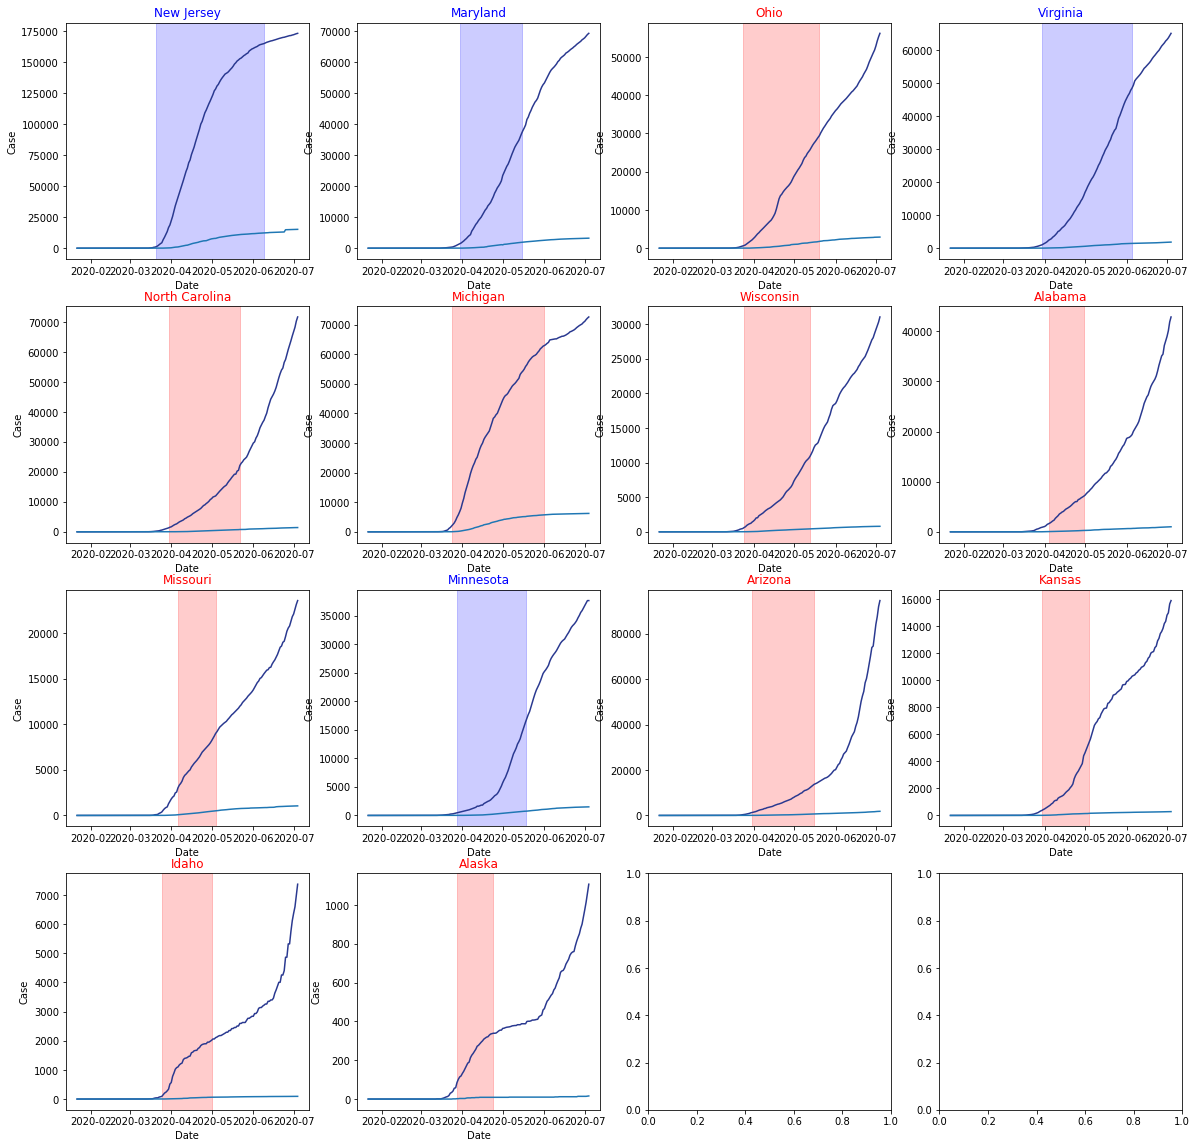

In [46]:
fig, ax = plt.subplots(figsize = (20, 20), nrows = 4, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="ended", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                            pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_ended"]).iloc[0], 
                            alpha=0.2, 
                            color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);
    i+=1


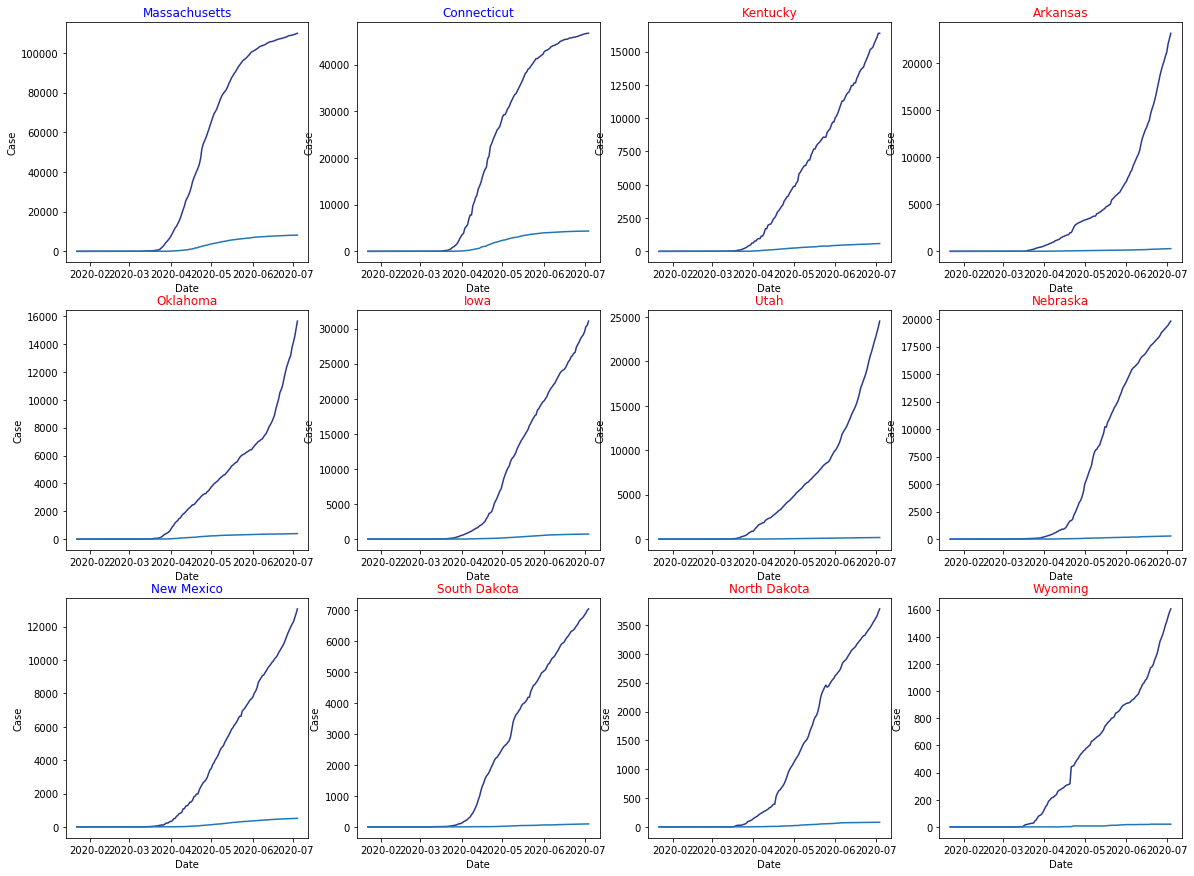

In [47]:
fig, ax = plt.subplots(figsize = (20, 15), nrows = 3, ncols = 4)

i=0
for state in df.loc[df["how_to_plot"]=="none", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    i+=1


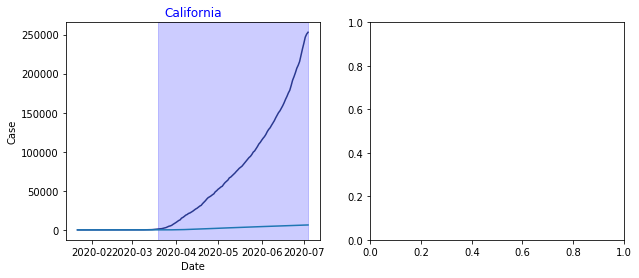

In [48]:
fig, ax = plt.subplots(figsize = (10, 4), nrows = 1, ncols = 2)

i=0
for state in df.loc[df["how_to_plot"]=="ongoing", "State"]:
    sns.lineplot(x = "Date", 
                 y = "Case", 
                 data = (time_series_cases.loc[time_series_cases["Province/State"]==state]
                         .groupby(["Province/State", "Date"], as_index=False)
                         .agg({"Case":"sum"})),
                 color = "#2a3990", 
                 ax = ax.flatten()[i]);

    ax.flatten()[i].plot("Date",
                         "Case", 
                         data = (time_series_deaths.loc[time_series_deaths["Province/State"]==state]
                                 .groupby(["Province/State", "Date"], as_index=False)
                                 .agg({"Case":"sum"})));

    ax.flatten()[i].set_title(state, color = df.loc[df["State"] == state, "color_2016_pe"].iloc[0])
    ax.flatten()[i].axvspan(pd.to_datetime(df.loc[df["State"] == state, "StayAtHome_start"]).iloc[0], 
                        time_series_deaths["Date"].max(), 
                        alpha=0.2, 
                        color=df.loc[df["State"] == state, "color_2016_pe"].iloc[0]);

    i+=1

In [49]:
df["StayAtHome_start"] = pd.to_datetime(df["StayAtHome_start"])
df["StayAtHome_eased"] = pd.to_datetime(df["StayAtHome_eased"])
df["StayAtHome_ended"] = pd.to_datetime(df["StayAtHome_ended"])

In [50]:
stay_at_home_lengths = []

for row in df.index:
    if pd.notna(df.loc[row, "StayAtHome_start"]):
        if df.loc[row, "how_to_plot"] == "ended":
            stay_at_home_lengths.append(df.loc[row, "StayAtHome_ended"] - df.loc[row, "StayAtHome_start"])
        elif df.loc[row, "how_to_plot"] == "eased":
            stay_at_home_lengths.append(df.loc[row, "StayAtHome_eased"] - df.loc[row, "StayAtHome_start"])
        else:
            stay_at_home_lengths.append(time_series_cases["Date"].max() - df.loc[row, "StayAtHome_start"])
    else:
        stay_at_home_lengths.append(pd.to_timedelta(0))
        
df = df.assign(stay_at_home_lengths_in_days = stay_at_home_lengths)
df["stay_at_home_lengths_in_days"] = df["stay_at_home_lengths_in_days"].dt.days



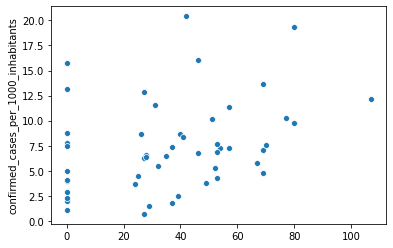

In [51]:
sns.scatterplot(pd.Series(stay_at_home_lengths).dt.days, df["confirmed_cases_per_1000_inhabitants"]);

In [52]:
pd.Series(stay_at_home_lengths).dt.days.corr(df["confirmed_cases_per_1000_inhabitants"])


0.32827554885493193

In [53]:
pd.Series(stay_at_home_lengths).dt.days.corr(df["deaths_per_1000_inhabitants"])

0.2303775452261356

In [54]:
lockdowns_df = df[["State", "2016 presidentialelection", "stay_at_home_lengths_in_days"]].copy()

In [55]:
scipy.stats.ttest_ind(lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Democratic"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"], 
                      lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Republican"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"],
                      equal_var=False)

Ttest_indResult(statistic=4.5167809320527414, pvalue=0.0001108986462130838)

In [56]:
lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Democratic"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"].mean()

61.470588235294116

In [57]:
lockdowns_df.loc[lockdowns_df["2016 presidentialelection"] == "Republican"].loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, "stay_at_home_lengths_in_days"].mean()

37.57142857142857

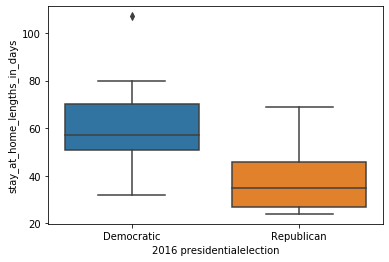

In [58]:
sns.boxplot(data = lockdowns_df.loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0], 
            x = "2016 presidentialelection", 
            y = "stay_at_home_lengths_in_days");

In [59]:
lockdowns_df.loc[lockdowns_df["stay_at_home_lengths_in_days"]!=0, ["2016 presidentialelection", "stay_at_home_lengths_in_days"]].to_csv("data/lockdown_lengths_for_tableau.csv")

In [60]:
df["StayAtHome_Delta"] =  pd.to_timedelta(df["StayAtHome_Delta"]).dt.days
df["PublicMask_Delta"] =  pd.to_timedelta(df["PublicMask_Delta"]).dt.days

In [61]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_deaths_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_deaths_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=0.1272538037464689, pvalue=0.8997575848102439)

In [62]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=-1.232121792659352, pvalue=0.22677624161339224)

In [63]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_Delta"], 
                      df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_Delta"], 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=-1.232121792659352, pvalue=0.22677624161339224)

In [64]:
scipy.stats.ttest_ind((df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_start"]-time_series_cases["Date"].min()).dt.days, 
                      (df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_start"]-time_series_cases["Date"].min()).dt.days, 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=2.9650507713618244, pvalue=0.005350185715503407)

In [65]:
((df.loc[df["2016 presidentialelection"]=="Republican", "StayAtHome_start"]-time_series_cases["Date"].min()).dt.days).mean()

67.85714285714286

In [66]:
((df.loc[df["2016 presidentialelection"]=="Democratic", "StayAtHome_start"]-time_series_cases["Date"].min()).dt.days).mean()

63.64705882352941

In [67]:
scipy.stats.ttest_ind((pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Republican", "Date_first_100_infections"])-time_series_cases["Date"].min()).dt.days, 
                      (pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Democratic", "Date_first_100_infections"])-time_series_cases["Date"].min()).dt.days, 
                      equal_var=False, 
                      nan_policy="omit")

Ttest_indResult(statistic=2.591908041060646, pvalue=0.013273805720076375)

In [68]:
((pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Republican", "Date_first_100_infections"])-time_series_cases["Date"].min()).dt.days).mean()

103.83333333333333

In [69]:
((pd.to_datetime(df.loc[df["2016 presidentialelection"]=="Democratic", "Date_first_100_infections"])-time_series_cases["Date"].min()).dt.days).mean()

82.75

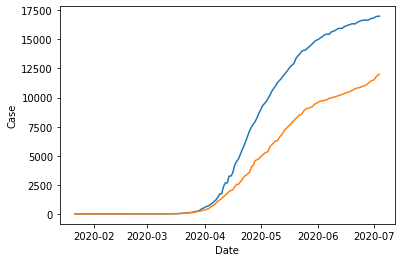

In [70]:
ax = sns.lineplot(data = (time_series_cases.loc[time_series_cases["Province/State"]=="Rhode Island"]
                     .groupby(["Province/State", "Date"], as_index=False)
                     .agg({"Case":"sum"})), 
             x = "Date", 
             y = "Case")

ax.plot("Date", 
        "Case",
        data = (time_series_cases.loc[time_series_cases["Province/State"]=="Delaware"]
                     .groupby(["Province/State", "Date"], as_index=False)
                     .agg({"Case":"sum"})))

In [71]:
ax.plot("Date", 
        "Case",
        data = (time_series_cases.loc[time_series_cases["Province/State"]=="New York"]
                     .groupby(["Province/State", "Date"], as_index=False)
                     .agg({"Case":"sum"})))

In [72]:
testing = pd.read_csv("raw_data/us_data_including_testing_by_state.csv")
testing.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200708,AK,1226.0,132175.0,NaN,30.0,NaN,NaN,NaN,0.0,...,133401,0,0,44f40820165a4480d4a1b8b031bb7e6bf3a22a40,0,0,0,0,0,NaN
1,20200708,AL,46962.0,421330.0,NaN,1110.0,3006.0,NaN,871.0,NaN,...,468292,25,45,9fc63c874a98fa97cfee6a65d2dff374513b499f,0,0,0,0,0,NaN
2,20200708,AR,24512.0,328760.0,NaN,358.0,1655.0,NaN,NaN,89.0,...,353272,9,51,4e164b092fdeac632ab1c0ba560c678d8d145ee2,0,0,0,0,0,NaN
3,20200708,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,816,0,0,bd11dff5c0315e06bc3cb7233119fe603b8a02ad,0,0,0,0,0,NaN
4,20200708,AZ,108614.0,532456.0,NaN,3421.0,5387.0,871.0,NaN,570.0,...,641070,36,115,45c65de1e639130ae8731cd08a825bd067bf53fe,0,0,0,0,0,NaN


In [73]:
testing = testing.rename({"state":"state_abb"}, axis=1)

In [74]:
inv_state_abbs = {"Alabama" : "AL" ,
                  "Alaska" : "AK",
                  "Arizona" : "AZ",
                  "Arkansas" : "AR",
                  "California" : "CA",
                  "Colorado" : "CO",
                  "Connecticut" : "CT",
                  "Delaware" : "DE",
                  "Florida" : "FL",
                  "Georgia" : "GA",
                  "Hawaii" : "HI",
                  "Idaho" : "ID",
                  "Illinois" : "IL",
                  "Indiana" : "IN",
                  "Iowa" : "IA",
                  "Kansas" : "KS",
                  "Kentucky" : "KY",
                  "Louisiana" : "LA",
                  "Maine" : "ME",
                  "Maryland" : "MD",
                  "Massachusetts" : "MA",
                  "Michigan" : "MI",
                  "Minnesota" : "MN",
                  "Mississippi" : "MS",
                  "Missouri" : "MO",
                  "Montana" : "MT",
                  "Nebraska" : "NE",
                  "Nevada" : "NV",
                  "New Hampshire" : "NH",
                  "New Jersey" : "NJ",
                  "New Mexico" : "NM",
                  "New York" : "NY",
                  "North Carolina" : "NC",
                  "North Dakota" : "ND",
                  "Ohio" : "OH",
                  "Oklahoma" : "OK",
                  "Oregon" : "OR",
                  "Pennsylvania" : "PA",
                  "Rhode Island" : "RI",
                  "South Carolina" : "SC",
                  "South Dakota" : "SD",
                  "Tennessee" : "TN",
                  "Texas" : "TX",
                  "Utah" : "UT",
                  "Vermont" : "VT",
                  "Virginia" : "VA",
                  "Washington" : "WA",
                  "West Virginia" : "WV",
                  "Wisconsin" : "WI",
                  "Wyoming" : "WY",
                  "American Samoa" : "AS", 
                  "Washington DC" : "DC", 
                  "Guam" : "GU", 
                  "Mariana Islands" : "MP", 
                  "Puerto Rico" : "PR", 
                  "Virgin Islands" : "VI"}

state_abbs = {v: k for k, v in inv_state_abbs.items()}

In [75]:
testing = testing.assign(State = testing["state_abb"].apply(lambda x: state_abbs[x]))

In [76]:
testing.columns

Index(['date', 'state_abb', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'State'],
      dtype='object')

In [77]:
df = df.merge(testing.loc[testing["date"] == 20200620, ["State", 'totalTestResults']], on = "State")

In [78]:
df = df.assign(tests_per_1000_inhabitants = df["totalTestResults"]/df["Pop"]*1000)

In [79]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"]=="Democratic", "tests_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"]=="Republican", "tests_per_1000_inhabitants"], 
                      equal_var=False)

Ttest_indResult(statistic=1.9168118584975071, pvalue=0.06496075616253925)

In [80]:
df.loc[df["2016 presidentialelection"]=="Democratic", "tests_per_1000_inhabitants"].mean()

90.2266010769968

In [81]:
df.loc[df["2016 presidentialelection"]=="Republican", "tests_per_1000_inhabitants"].mean()

73.43454493277406

In [82]:
df.columns

Index(['State', '2016 presidentialelection', 'Governor', 'State Senate',
       'State House', 'SeniorU.S. Senator', 'JuniorU.S. Senator',
       'U.S. House of Representatives', 'Partisan split (as of 2018[update])',
       'Confirmed_cases', 'Deaths_x', 'Density', 'Pop', 'LandArea',
       'confirmed_cases_per_1000_inhabitants', 'deaths_per_1000_inhabitants',
       'Date_first_100_infections', 'Infections', 'Date_first_100_deaths',
       'Deaths_y', 'PublicMask_start', 'PublicMask_eased', 'PublicMask_ended',
       'StayAtHome_start', 'StayAtHome_eased', 'StayAtHome_ended',
       'StayAtHome_Delta', 'PublicMask_Delta', 'StayAtHome_deaths_Delta',
       'PublicMask_deaths_Delta', 'StayAtHome_policy_eased',
       'PublicMask_policy_eased', 'StayAtHome_policy_ended',
       'PublicMask_policy_ended', 'how_to_plot', 'color_2016_pe',
       'stay_at_home_lengths_in_days', 'totalTestResults',
       'tests_per_1000_inhabitants'],
      dtype='object')

In [83]:
df_for_plot = (df[["State", 
                   "2016 presidentialelection", 
                   "Date_first_100_infections", 
                   "StayAtHome_start", 
                   "StayAtHome_eased", 
                   "StayAtHome_ended", 
                   "how_to_plot", 
                   "color_2016_pe"]].copy())
df_for_plot = df_for_plot.sort_values("2016 presidentialelection")

In [84]:
df_for_plot = df_for_plot.assign(index = np.arange(1,51))
df_for_plot = (df_for_plot[["index", 
                            "State", 
                            "2016 presidentialelection", 
                            "Date_first_100_infections", 
                            "StayAtHome_start", 
                            "StayAtHome_eased", 
                            "StayAtHome_ended", 
                            "how_to_plot", 
                            "color_2016_pe"]])

In [85]:
df_for_plot["Date_first_100_infections"] = pd.to_datetime(df_for_plot["Date_first_100_infections"])
df_for_plot.head()

,index,State,2016 presidentialelection,Date_first_100_infections,StayAtHome_start,StayAtHome_eased,StayAtHome_ended,how_to_plot,color_2016_pe
0,1,New Jersey,Democratic,2020-04-05,2020-03-21,NaT,2020-06-09,ended,blue
36,2,Colorado,Democratic,2020-03-29,2020-03-26,2020-04-27,NaT,eased,blue
37,3,Oregon,Democratic,2020-04-09,2020-03-23,2020-05-15,2020-06-19,eased,blue
38,4,Maine,Democratic,2020-05-13,2020-04-02,2020-05-29,NaT,eased,blue
21,5,Washington,Democratic,2020-06-16,2020-03-23,2020-06-01,NaT,eased,blue


In [86]:
df_for_plot["color_2016_pe"] = np.where(df_for_plot["color_2016_pe"] == "blue", "#4E79A7", "#E15759")

''

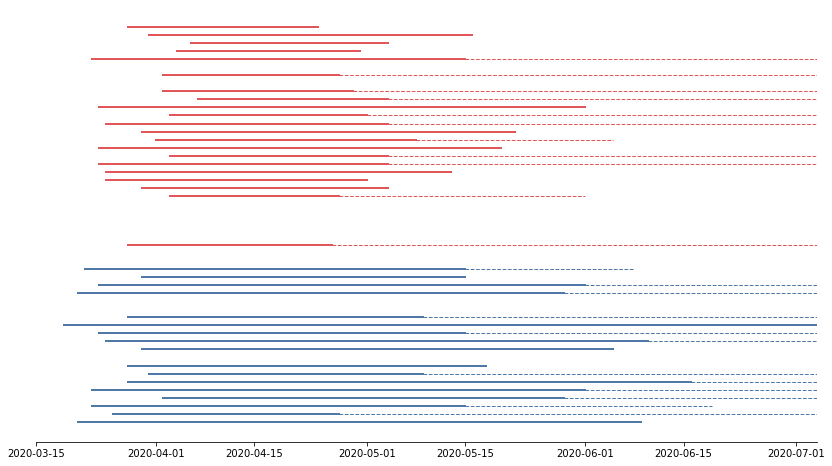

In [87]:
fig, ax = plt.subplots(figsize=(14,8))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([])

#plt.scatter("Date_first_100_infections", "index", data = df_for_plot, s=40, color="#585858")

# tableau colors: blue #4E79A7 red: #E15759

for index in df_for_plot.index:
    if df_for_plot.loc[index, "how_to_plot"]=="ended":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="eased":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_eased"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        if pd.notna(df_for_plot.loc[index, "StayAtHome_ended"]):
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
        else:
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], time_series_cases["Date"].max()], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="ongoing":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], time_series_cases["Date"].max()], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        
ax.set_xlim((pd.to_datetime("20200315"), time_series_cases["Date"].max()))
plt.savefig("stay_at_home_orders_plot.png", bbox_inches="tight")
;

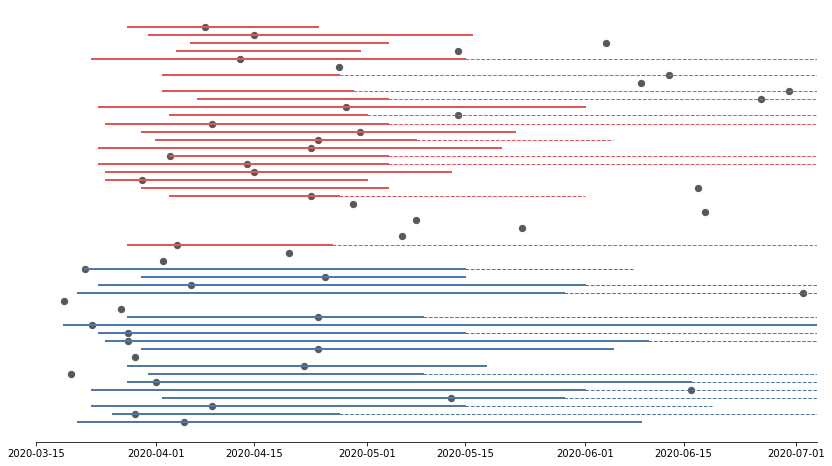

In [89]:
fig, ax = plt.subplots(figsize=(14,8))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([])

plt.scatter("Date_first_100_infections", "index", data = df_for_plot, s=40, color="#585858")


for index in df_for_plot.index:
    if df_for_plot.loc[index, "how_to_plot"]=="ended":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="eased":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], df_for_plot.loc[index, "StayAtHome_eased"]], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        if pd.notna(df_for_plot.loc[index, "StayAtHome_ended"]):
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], df_for_plot.loc[index, "StayAtHome_ended"]], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
        else:
            plt.plot_date([df_for_plot.loc[index, "StayAtHome_eased"], time_series_cases["Date"].max()], 
                          [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                          color=df_for_plot.loc[index, "color_2016_pe"], 
                          linestyle='--', 
                          linewidth=1, 
                          marker="")
    elif df_for_plot.loc[index, "how_to_plot"]=="ongoing":
        plt.plot_date([df_for_plot.loc[index, "StayAtHome_start"], time_series_cases["Date"].max()], 
                      [df_for_plot.loc[index, "index"], df_for_plot.loc[index, "index"]], 
                      color=df_for_plot.loc[index, "color_2016_pe"], 
                      linestyle='-', 
                      linewidth=2, 
                      marker="")
        
ax.set_xlim((pd.to_datetime("20200315"), time_series_cases["Date"].max()))
plt.savefig("stay_at_home_orders_plot_with_dots.png", bbox_inches="tight")
